<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Exercise_Data_Visualization_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
nsfg = pd.read_hdf('nsfg.hdf5')
nsfg

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


In [ ]:
# Calculate the number of rows and columns in the DataFrame nsfg.
nsfg.shape

(9358, 10)

In [ ]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [ ]:
# Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(ounces.head())

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


## Clean a variable

In [ ]:
# In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
nsfg['nbrnaliv'].replace(8, np.nan, inplace=True)

# Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.
Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [ ]:
# Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.
agecon = nsfg.agecon / 100
agepreg = nsfg.agepreg / 100

# Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.
preg_length = agepreg - agecon

# Use .describe() to compute the mean duration and other summary statistics.
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Make a histogram

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype

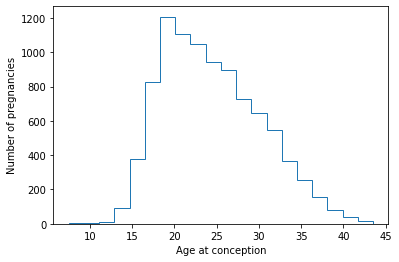

In [ ]:
# Plot a histogram of agecon with 20 bins and setting the parameter histtype to be 'step'..
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight

In [ ]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [ ]:
# Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
full_term = nsfg.prglngth >= 37

# Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


## Filter

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
single = nsfg.nbrnaliv == 1

# Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# For comparison, select multiple, full-term babies and compute their mean birth weight.
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556
